In [17]:
import pennylane as qml

from pennylane import numpy as np

import matplotlib.pyplot as plt


dev = qml.device('default.mixed', wires = 1)

# @qml.qinfo.classical_fisher
@qml.qnode(dev)
def circuit(theta):
	gamma = 0.9
	coeff = np.array([ ((1+np.exp(-1.j * theta))/2) * (np.sqrt(1-gamma)) , (1-np.exp(-1.j * theta))/2 ]) / (1-gamma * (np.cos(theta)**2) ) 
	After_normalized = coeff / np.sqrt( np.sum( np.abs(coeff)**2))
	
	qml.QubitStateVector(After_normalized, wires=range(1))
 
	return qml.probs(wires=range(1))

# Paras of CFI => tensor + grad = True
x = np.array(2, requires_grad = True)
print('Type of para = ', type(x))
print(qml.qinfo.classical_fisher(circuit)(x)[0])

Type of para =  <class 'pennylane.numpy.tensor.tensor'>
[0.1839719]


https://quantumcomputing.stackexchange.com/questions/33993/problems-trying-to-plot-the-classical-fisher-information-with-pennylane

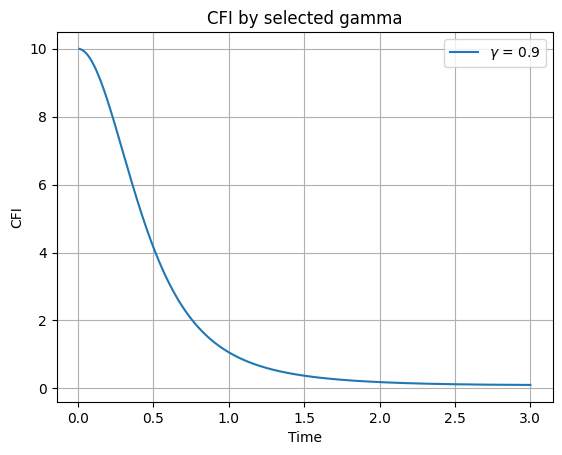

In [18]:
N = 1000
tau_CFI = np.linspace(0.01, 3.0, N, requires_grad = True)

CFI_numpy = np.zeros(N)

for i in range(len(tau_CFI)):
    CFI_numpy[i] = qml.qinfo.classical_fisher(circuit)(tau_CFI[i])
    CFI_numpy[i] = round((np.array(CFI_numpy[i], requires_grad = False)).numpy(), 10)
    

gamma = 0.9

plt.subplot()
plt.plot(tau_CFI, CFI_numpy, label = f'$\gamma$ = {gamma}')

plt.title('CFI by selected gamma')
plt.xlabel('Time')
plt.ylabel('CFI')
plt.legend()
plt.grid()

* What is CFI in quantum sensing method?

: Slope of the measurement signal correspods to change of the physical quantity